In [ ]:
!pip3 install lmfit
import lmfit as lm
import numpy as np
import pandas as pd
import glob
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.1 MB/s eta 0:00:00


important: uncertainty is sqrt of signal to noise ratio. noise is measured to be 20 pulses/second

The wavelength of the laser is 672 nm
Lambda [671.51020408] nm
Error [0.0001675] nm


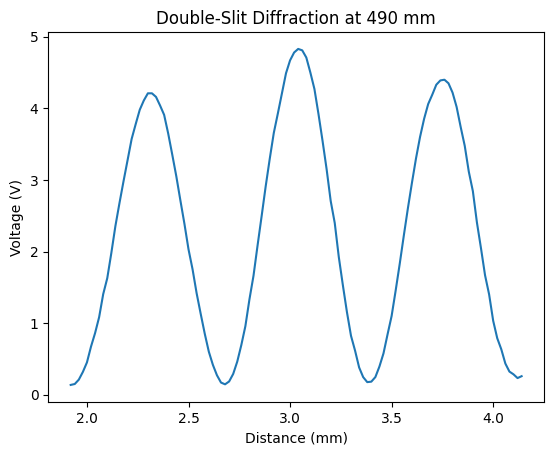

<Figure size 640x480 with 0 Axes>

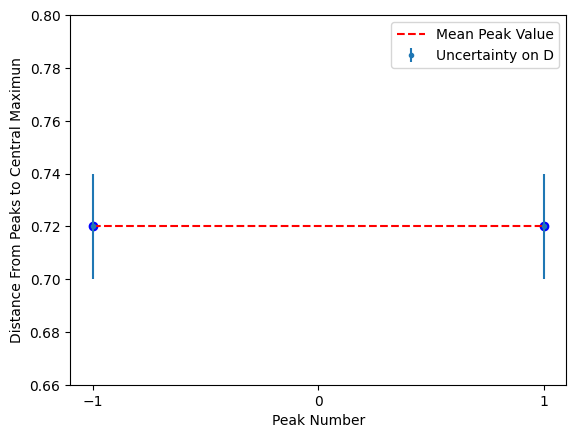

In [ ]:
df = pd.read_csv('/DIFF_Lab/DIFF Lab/test1_double.csv')



dist = np.array(df['Distance (mm)'])
V = np.array(df['Voltage (V)'])

#peak finding function
def find_peaks(dist, V, threshold):
    peaks = []
    for i in range(1, len(dist)-1):
        if V[i] > threshold and V[i] > V[i-1] and V[i] > V[i+1]:
            peaks.append(dist[i])
    return peaks

#find peaks
peaks = find_peaks(dist, V, 2.0)

#distances between peaks
distance = []
for i in range(1, len(peaks)):
    distance.append(peaks[i] - peaks[i-1])

plt.figure
plt.plot(dist, V)
plt.xlabel('Distance (mm)')
plt.ylabel('Voltage (V)')
plt.title('Double-Slit Diffraction at 490 mm')


D = np.array(distance)
L = 490.0
d = 4.57
m = 1.0

lambda_double = (d * D)/(m * L)

wavelength = lambda_double * 100000

print("The wavelength of the laser is %.0f" % wavelength, "nm")

#important note - from looking at the raw data, the distance between peaks is indentical, so no need to calculate it


################
#error 
#D = 0.72
dLambdadD = 1/L
dLambdadL = -D/(L**2)
sigma_D = 0.02
sigma_L = 1.0

error_lambda = (dLambdadD**2 * sigma_D**2) + (dLambdadL**2 * sigma_L**2)
print("Lambda", wavelength, "nm")
print("Error", error_lambda * 100000, "nm")

peak_number = np.array([-1, 1])
peak = np.array([.72, .72])
maximum = np.array([-1, 0, 1])

plt.figure()
#plt.legend()
fig, ax = plt.subplots()
ax.set_xticks(maximum)
plt.plot(peak_number, peak, 'bo')
plt.xlabel('Peak Number')
plt.ylabel('Distance From Peaks to Central Maximun')
#plt.title('D')
plt.ylim(0.66, 0.8)
plt.plot(peak_number, np.ones(len(peak_number)) * 0.72, '--r', label = 'Mean Peak Value')
plt.errorbar(peak_number, peak, yerr = sigma_D, fmt = '.', label = 'Uncertainty on D')
plt.legend()
plt.show()

wavelength 81.6326530612245 nm


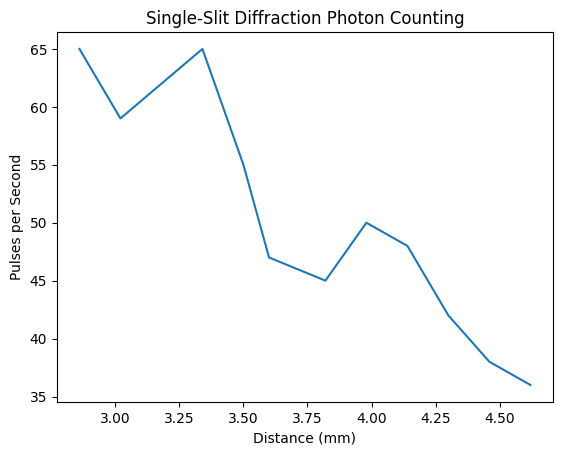

In [ ]:
df = pd.read_csv('/DIFF_Lab/DIFF Lab/test2_single.csv')

dist = df['Distance (mm)']
P = df['Pulse/second']

plt.xlabel('Distance (mm)')
plt.ylabel('Pulses per Second')
plt.title('Single-Slit Diffraction Photon Counting')
plt.plot(dist, P)

#distance between peaks
#no code needed, data is terrible and it is faster to count by hand in the raw than to automate it

#distance between peak 1 and peak 2
D_1 = 3.34 - 2.86
D_2 = 3.98 - 3.34

avg_D = (D_1 + D_2)/2


#single slit  -  tan theta = D/L from small angle approx
#a sin theta = m * lambda

D = avg_D
a = 0.1
L = 490
m1 = 1
m2 = 2

lambda_single_1 = (a * D_1)/(L * m1)
lambda_single_2 = (a * D_2)/(L * m2)

avg_wavelength = ((lambda_single_1 + lambda_single_2)/2) * 1000000
print("wavelength", avg_wavelength, "nm")


wavelength 475.65306122448965 nm
Lambda 475.65306122448965 nm
Error 0.0010416840060914509 nm
wavelength 671.5102040816327 nm


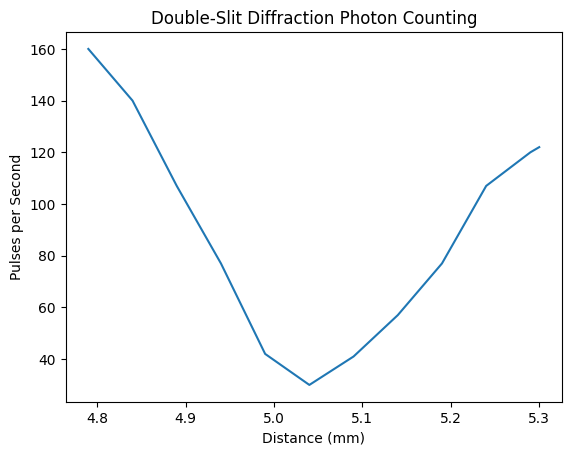

<Figure size 640x480 with 0 Axes>

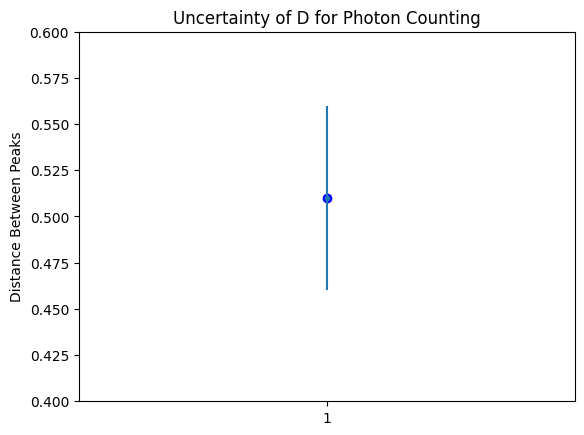

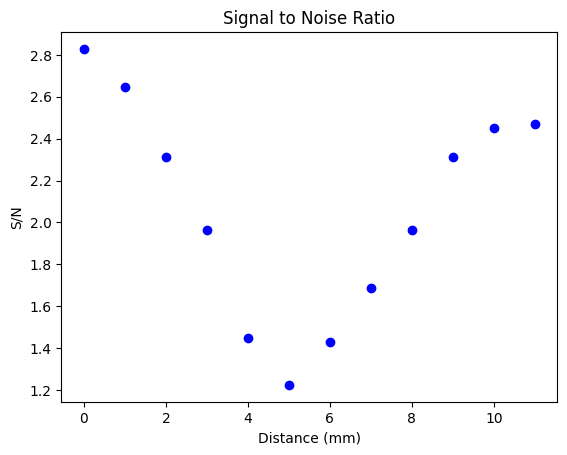

In [ ]:
df = pd.read_csv('/DIFF_Lab/DIFF Lab/test2_double.csv')

dist = df['Distance (mm)']
P = df['Pulse/second']


D = 5.3 - 4.79
L = 490.0
d = 0.457
m = 1.0

lambda_double_2 = (d * D)/(m * L)
print("wavelength", lambda_double_2 * 1000000, "nm")
wavelength = lambda_double_2 * 1000000

plt.xlabel('Distance (mm)')
plt.ylabel('Pulses per Second')
plt.title('Double-Slit Diffraction Photon Counting')
plt.plot(dist, P)

dLambdadD = 1/L
dLambdadL = -D/(L**2)
sigma_D = 0.05
sigma_L = 1.0

error_lambda = (dLambdadD**2 * sigma_D**2) + (dLambdadL**2 * sigma_L**2)
print("Lambda", wavelength, "nm")
print("Error", error_lambda * 100000, "nm")

peak_number = np.array([ 1])
peak = np.array([D])
maximum = np.array([0, 1])

plt.figure()
fig, ax = plt.subplots()
ax.set_xticks(maximum)
plt.plot(peak_number, peak, 'bo')
#plt.xlabel('Peak Number')
plt.ylabel('Distance Between Peaks')
plt.title('Uncertainty of D for Photon Counting')
plt.ylim(0.4, 0.6)
#plt.plot(peak_number, np.ones(len(peak_number)) * 0.72, '--r')
plt.errorbar(peak_number, peak, yerr = sigma_D, fmt = '.')


#noise
N = 20
#signal to noise ratio
SNratio = np.sqrt(P/N)
x_ax = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

lambda_double_2 = (d * D)/(m * L)
print("wavelength", lambda_double_2 * 1000000, "nm")
wavelength = lambda_double_2 * 1000000

plt.figure()
plt.xlabel('Distance (mm)')
plt.ylabel('S/N')
plt.title('Signal to Noise Ratio')
plt.plot(x_ax, SNratio, 'bo')
#plt.errorbar(dist, P, yerr = SNratio, fmt = '.')